In [ ]:
import pandas as pd

# Load the first dataset
df_puskesmas = pd.read_excel('/content/diabetes_puskesmas.xlsx')

# Load the second dataset
df_prediction = pd.read_csv('/content/diabetes_prediction_dataset.csv')

# Display the first 5 rows of each dataframe
print("Dataframe from diabetes_puskesmas.xlsx:")
display(df_puskesmas.head())

print("\nDataframe from diabetes_prediction_dataset.csv:")
display(df_prediction.head())

Dataframe from diabetes_puskesmas.xlsx:


,No,Nama,Jenis Kelamin,Umur,HbA1c,HCT (Hematokrit),WBC (White Blood Cells),RBC (Red Blood Cells),PLT (Platelet),Gula Darah,Label,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1,Nina,P,29,9.5,31.9,9.63,4.50,471,135,Diabetes Melitus,NaN,NaN,NaN,NaN,NaN
1,2,Febriyani,P,27,9.4,29.7,8.12,3.70,203,146,Diabetes Melitus,NaN,NaN,NaN,NaN,NaN
2,3,Bilqis Husri,P,28,10.4,32.8,11.77,5.16,512,187,Diabetes Melitus,NaN,NaN,NaN,NaN,NaN
3,4,Sahimah,P,80,12.1,37.0,12.05,4.40,213,151,Diabetes Melitus,NaN,NaN,NaN,NaN,NaN
4,5,Wusuf,P,29,11.2,33.2,6.29,3.82,260,162,Diabetes Melitus,NaN,NaN,NaN,NaN,NaN



Dataframe from diabetes_prediction_dataset.csv:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Manipulasi data
import pandas as pd
import numpy as np

# Visualisasi data & hasil evaluasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Feature Selection / Dimensionality Reduction
from sklearn.decomposition import PCA

# Algoritma Klasifikasi
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier   # base estimator untuk AdaBoost

# Evaluasi Model
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)

# Encoding data kategorikal
from sklearn.preprocessing import LabelEncoder

# Menangani imbalance dataset
from imblearn.over_sampling import ADASYN


In [ ]:
print("Data types of columns in df_prediction:")
display(df_prediction.dtypes)

Data types of columns in df_prediction:


,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [ ]:
print("Missing values in df_prediction:")
display(df_prediction.isnull().sum())

Missing values in df_prediction:


,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


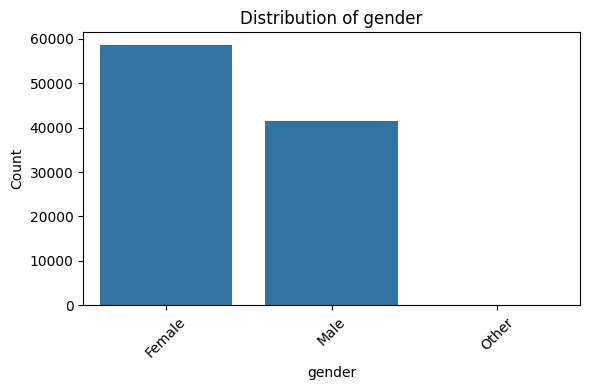

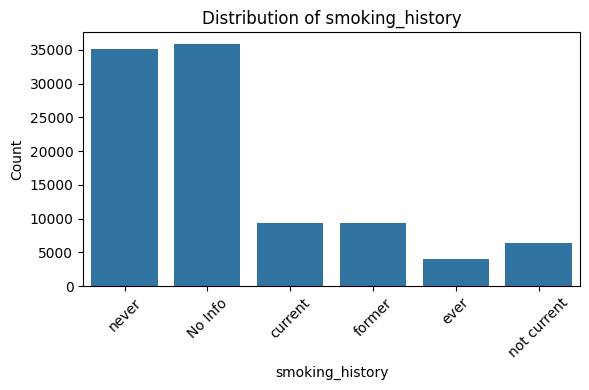

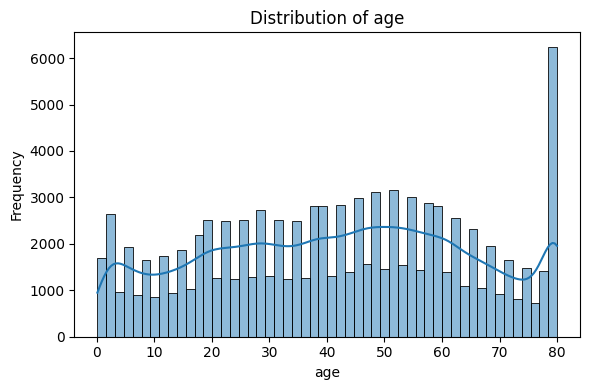

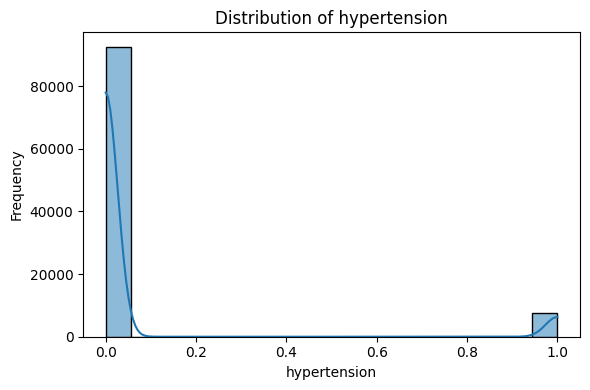

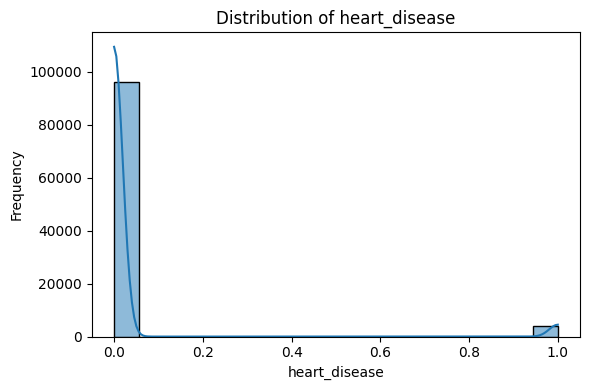

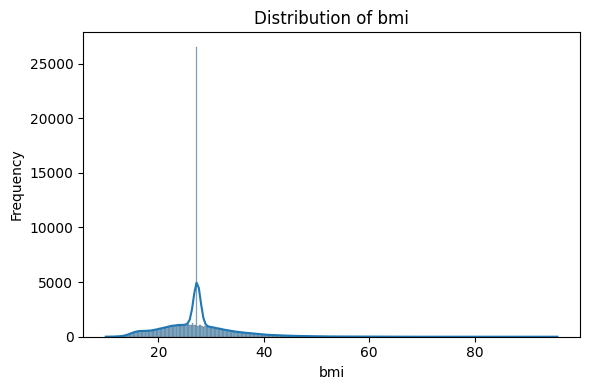

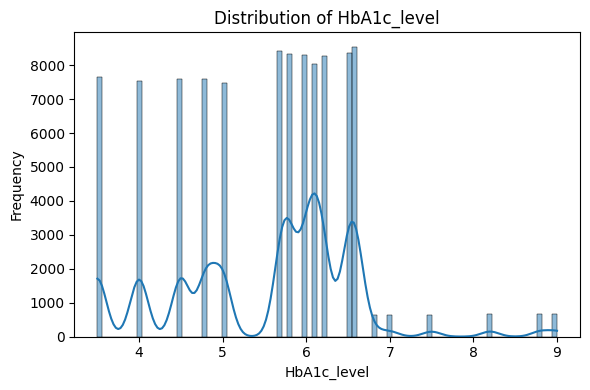

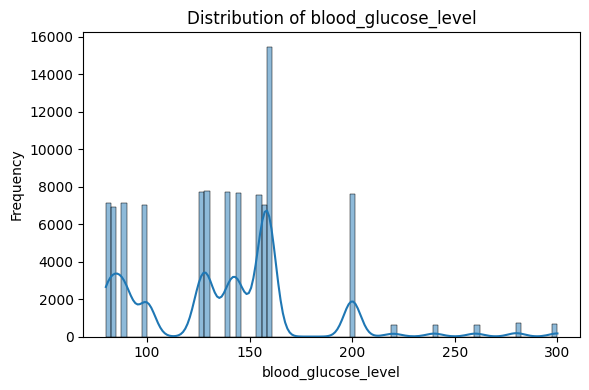

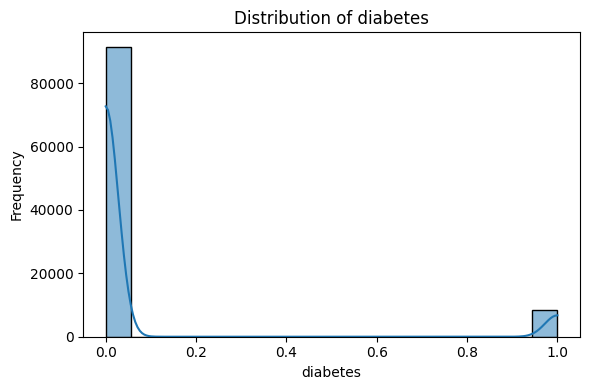

In [ ]:
# Select columns with 'object' dtype
object_cols = df_prediction.select_dtypes(include=['object']).columns

# Create bar plots for each object column
for col in object_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_prediction, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Select numerical columns
numerical_cols = df_prediction.select_dtypes(include=np.number).columns

# Create histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_prediction, x=col, kde=True) # kde=True adds a kernel density estimate line
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Cek jumlah duplikat data

In [ ]:
print("Number of duplicate rows in df_prediction:", df_prediction.duplicated().sum())

Number of duplicate rows in df_prediction: 3854


## Cek Outlier

In [ ]:
from scipy.stats import zscore

# Select numerical columns
numerical_cols = df_prediction.select_dtypes(include=np.number).columns

# Calculate Z-scores for numerical columns
z_scores = np.abs(zscore(df_prediction[numerical_cols]))

# Set a Z-score threshold (e.g., 3)
threshold = 4

# Create a mask to identify outliers
outlier_mask = (z_scores > threshold).any(axis=1)

# Count the number of outliers
num_outliers = outlier_mask.sum()

print(f"Number of outliers (Z-score > {threshold}): {num_outliers}")

Number of outliers (Z-score > 4): 4309


# Preprocessing

## Penanganan data duplikat

In [ ]:
print("Shape of df_prediction before removing duplicates:", df_prediction.shape)

# Remove duplicate rows
df_prediction_cleaned = df_prediction.drop_duplicates()

print("Shape of df_prediction after removing duplicates:", df_prediction_cleaned.shape)

Shape of df_prediction before removing duplicates: (100000, 9)
Shape of df_prediction after removing duplicates: (96146, 9)


## Data Tranformation

In [ ]:
# Encoding categorical columns using LabelEncoder and replacing the original columns
label_encoder_gender = LabelEncoder()
df_prediction_cleaned['gender'] = label_encoder_gender.fit_transform(df_prediction_cleaned['gender'])

label_encoder_smoking = LabelEncoder()
df_prediction_cleaned['smoking_history'] = label_encoder_smoking.fit_transform(df_prediction_cleaned['smoking_history'])

# # Display the mapping for gender
# print("Mapping for 'gender':")
# for i, class_name in enumerate(label_encoder_gender.classes_):
#     print(f"{class_name}: {i}")

# # Display the mapping for smoking_history
# print("\nMapping for 'smoking_history':")
# for i, class_name in enumerate(label_encoder_smoking.classes_):
#     print(f"{class_name}: {i}")

# Display the first 5 rows after encoding
print("\nDataframe after encoding:")
display(df_prediction_cleaned.head())


Dataframe after encoding:


/tmp/ipython-input-758384184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prediction_cleaned['gender'] = label_encoder_gender.fit_transform(df_prediction_cleaned['gender'])
/tmp/ipython-input-758384184.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prediction_cleaned['smoking_history'] = label_encoder_smoking.fit_transform(df_prediction_cleaned['smoking_history'])


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


## Hitung Z-Score

In [ ]:
from scipy.stats import zscore

# Select numerical columns from the cleaned dataframe
numerical_cols_cleaned = df_prediction_cleaned.select_dtypes(include=np.number).columns

# Calculate Z-scores for numerical columns
z_scores_cleaned = zscore(df_prediction_cleaned[numerical_cols_cleaned])

# Convert Z-scores to a DataFrame for better display
z_scores_df = pd.DataFrame(z_scores_cleaned, columns=numerical_cols_cleaned, index=df_prediction_cleaned.index)

print("Z-scores for numerical columns:")
display(z_scores_df.head())

Z-scores for numerical columns:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,-0.843459,1.700840,-0.290050,4.848534,0.940896,-0.314947,0.994563,0.043554,-0.311056
1,-0.843459,0.543372,-0.290050,-0.206248,-1.186816,-0.000216,0.994563,-1.423096,-0.311056
2,1.183769,-0.614096,-0.290050,-0.206248,0.940896,-0.000216,0.155970,0.483549,-0.311056
3,-0.843459,-0.257952,-0.290050,-0.206248,-0.654888,-0.572051,-0.496269,0.410216,-0.311056
4,1.183769,1.522768,3.447677,4.848534,-0.654888,-1.061141,-0.682623,0.410216,-0.311056


## Penanganan Outlier

In [ ]:
from scipy.stats import zscore
import numpy as np

# Select numerical columns from the cleaned dataframe
numerical_cols_cleaned = df_prediction_cleaned.select_dtypes(include=np.number).columns

# Calculate Z-scores for numerical columns
z_scores_cleaned = zscore(df_prediction_cleaned[numerical_cols_cleaned])

# Convert Z-scores to a DataFrame for easier handling
z_scores_df = pd.DataFrame(z_scores_cleaned, columns=numerical_cols_cleaned, index=df_prediction_cleaned.index)

# Define the outlier threshold
threshold = 4

# Create a boolean mask to identify outlier rows (rows with at least one numerical column |Z-score| > threshold)
outlier_rows_mask = (np.abs(z_scores_df) > threshold).any(axis=1)

# Display the shape of the dataframe before removing outliers
print("Shape of df_prediction_cleaned before removing outliers:", df_prediction_cleaned.shape)

# Create a dataframe containing only the outlier rows
outlier_data = df_prediction_cleaned[outlier_rows_mask]

# Create a dataframe containing rows without outliers
df_prediction_no_outliers = df_prediction_cleaned[~outlier_rows_mask]

# Display the shape of the dataframe after removing outliers
print("Shape of df_prediction_cleaned after removing outliers:", df_prediction_no_outliers.shape)

print(f"\nRows identified as outliers (Z-score > {threshold} or < {-threshold}):")
display(outlier_data.head()) # Displaying head as the outlier data might be large

print("\nDataframe after removing outliers:")
display(df_prediction_no_outliers.head()) # Displaying head

Shape of df_prediction_cleaned before removing outliers: (96146, 9)
Shape of df_prediction_cleaned after removing outliers: (91890, 9)

Rows identified as outliers (Z-score > 4 or < -4):


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
4,1,76.0,1,1,1,20.14,4.8,155,0
11,0,54.0,0,0,3,54.70,6.0,100,0
23,0,72.0,0,1,3,27.94,6.5,130,0
26,1,67.0,0,1,5,27.32,6.5,200,1



Dataframe after removing outliers:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1


## Information Gain

Information Gain for each feature:


,Feature,Information Gain
6,HbA1c_level,0.123026
7,blood_glucose_level,0.105104
1,age,0.036535
5,bmi,0.022425
4,smoking_history,0.013373
2,hypertension,0.012310
0,gender,0.010050
3,heart_disease,0.000734


/tmp/ipython-input-2460292395.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Information Gain', y='Feature', data=information_gain_df, palette='viridis') # Added palette


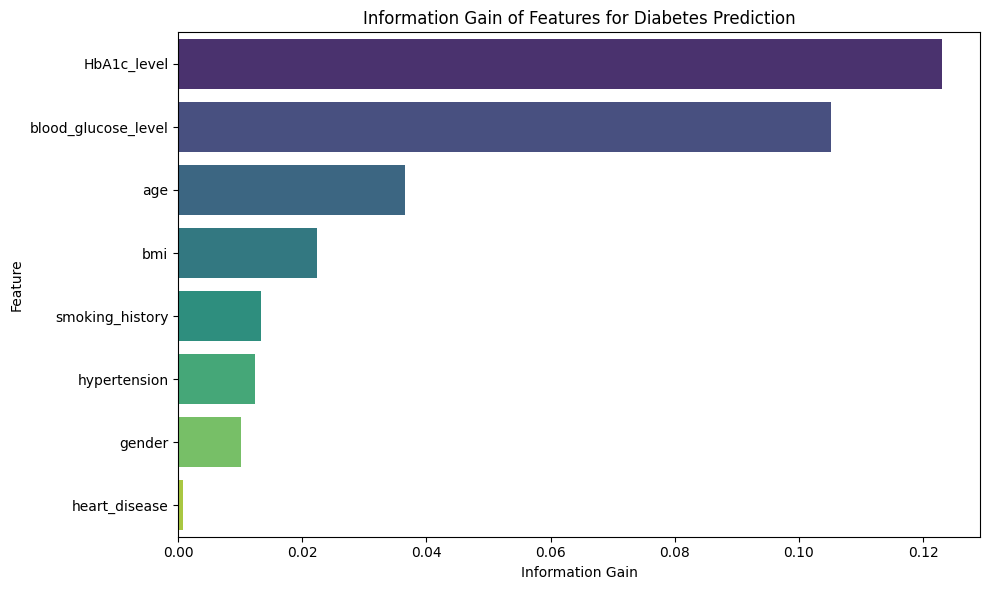


Feature Ranking based on Information Gain:
7. HbA1c_level: 0.1230
8. blood_glucose_level: 0.1051
2. age: 0.0365
6. bmi: 0.0224
5. smoking_history: 0.0134
3. hypertension: 0.0123
1. gender: 0.0101
4. heart_disease: 0.0007


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Separate features (X) and target (y) from the dataframe without outliers
X = df_prediction_no_outliers.drop('diabetes', axis=1)
y = df_prediction_no_outliers['diabetes']

# Calculate information gain for each feature
information_gain_values = mutual_info_classif(X, y)

# Create a DataFrame to store feature names and their information gain values
information_gain_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': information_gain_values})

# Sort the DataFrame by Information Gain in descending order
information_gain_df = information_gain_df.sort_values(by='Information Gain', ascending=False)

print("Information Gain for each feature:")
display(information_gain_df)

# Create a bar plot of Information Gain with a color palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Information Gain', y='Feature', data=information_gain_df, palette='viridis') # Added palette
plt.title('Information Gain of Features for Diabetes Prediction')
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Display the ranking of features based on Information Gain
print("\nFeature Ranking based on Information Gain:")
for index, row in information_gain_df.iterrows():
    print(f"{index + 1}. {row['Feature']}: {row['Information Gain']:.4f}")

## Correelationn Matrix

Correlation Matrix (excluding encoded columns and heart_disease):


,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.249917,0.366550,0.095457,0.104268,0.249805
hypertension,0.249917,1.000000,0.148711,0.074837,0.081279,0.190227
bmi,0.366550,0.148711,1.000000,0.076909,0.085316,0.205792
HbA1c_level,0.095457,0.074837,0.076909,1.000000,0.155804,0.386440
blood_glucose_level,0.104268,0.081279,0.085316,0.155804,1.000000,0.406509
diabetes,0.249805,0.190227,0.205792,0.386440,0.406509,1.000000


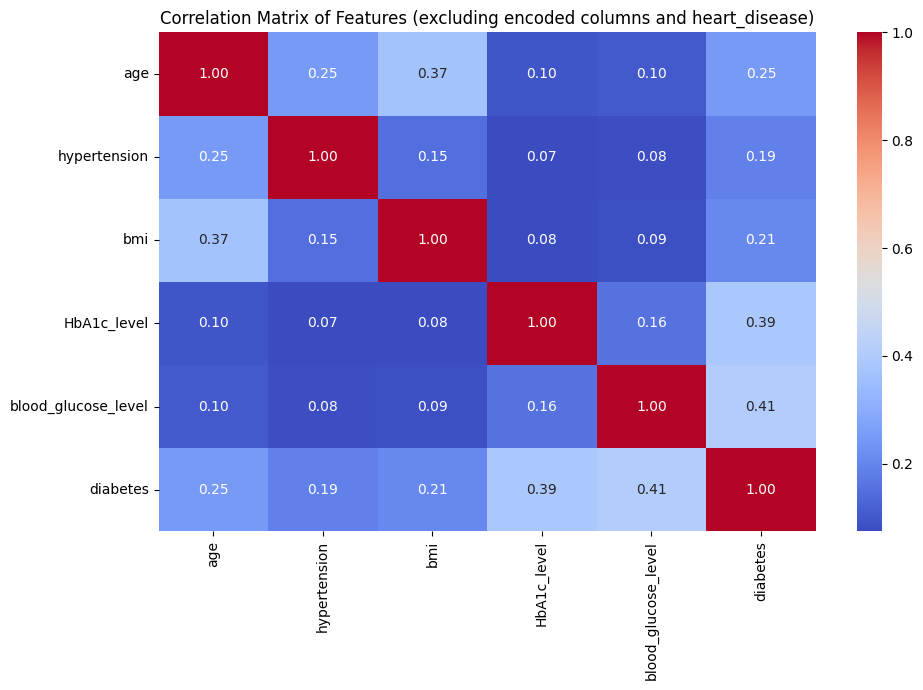

In [ ]:
# Drop the encoded columns and the 'heart_disease' column
df_prediction_for_correlation = df_prediction_no_outliers.drop(columns=['smoking_history', 'gender', 'heart_disease'])

# Calculate the correlation matrix for the modified dataframe
correlation_matrix = df_prediction_for_correlation.corr()

print("Correlation Matrix (excluding encoded columns and heart_disease):")
display(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features (excluding encoded columns and heart_disease)')
plt.tight_layout()
plt.show()

In [ ]:
# Get the correlation of each feature with the target variable 'diabetes'
correlation_with_diabetes = correlation_matrix['diabetes'].sort_values(ascending=False)

print("Correlation with 'diabetes' (sorted):")
display(correlation_with_diabetes)

Correlation with 'diabetes' (sorted):


,diabetes
diabetes,1.000000
blood_glucose_level,0.406509
HbA1c_level,0.386440
age,0.249805
bmi,0.205792
hypertension,0.190227


In [ ]:
# Drop the specified columns
columns_to_drop = ['hypertension', 'heart_disease', 'smoking_history', 'bmi']
df_prediction_reduced = df_prediction_no_outliers.drop(columns=columns_to_drop)

print("Dataframe after dropping unnecessary columns:")
display(df_prediction_reduced.head())

Dataframe after dropping unnecessary columns:


,gender,age,HbA1c_level,blood_glucose_level,diabetes
1,0,54.0,6.6,80,0
2,1,28.0,5.7,158,0
3,0,36.0,5.0,155,0
5,0,20.0,6.6,85,0
6,0,44.0,6.5,200,1


## Spliting Data

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_prediction_reduced.drop('diabetes', axis=1)
y = df_prediction_reduced['diabetes']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Using random_state for reproducibility

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (73512, 4)
Shape of X_test: (18378, 4)
Shape of y_train: (73512,)
Shape of y_test: (18378,)


In [ ]:
print("Fitur yang digunakan untuk modeling:")
display(X.columns)

Fitur yang digunakan untuk modeling:


Index(['gender', 'age', 'HbA1c_level', 'blood_glucose_level'], dtype='object')

## Oversampling ADASYN

Shape of training data before ADASYN:
X_train shape: (73512, 4)
y_train shape: (73512,)

Distribution of target variable before ADASYN:


,count
diabetes,
0,67846
1,5666



Shape of training data after ADASYN:
X_train_adasyn shape: (135439, 4)
y_train_adasyn shape: (135439,)

Distribution of target variable after ADASYN:


,count
diabetes,
0,67846
1,67593


/tmp/ipython-input-1647023982.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette='viridis')
/tmp/ipython-input-1647023982.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_adasyn, ax=axes[1], palette='viridis')


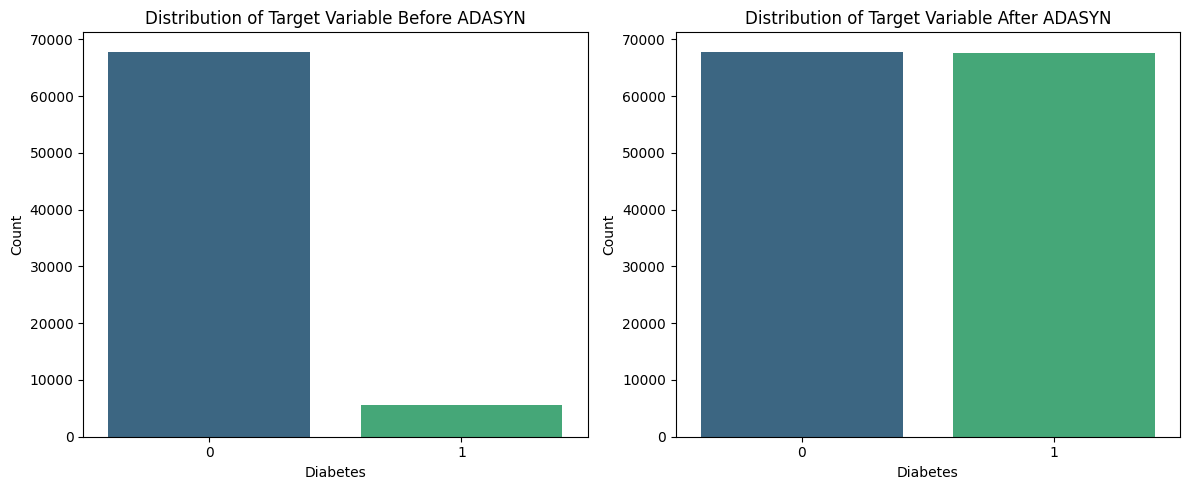

In [ ]:
from imblearn.over_sampling import ADASYN

# Display the shape of the training data before ADASYN
print("Shape of training data before ADASYN:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Display the distribution of the target variable before ADASYN
print("\nDistribution of target variable before ADASYN:")
display(y_train.value_counts())

# Apply ADASYN to the training data with 'minority' strategy
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Display the shape of the training data after ADASYN
print("\nShape of training data after ADASYN:")
print("X_train_adasyn shape:", X_train_adasyn.shape)
print("y_train_adasyn shape:", y_train_adasyn.shape)

# Display the distribution of the target variable after ADASYN
print("\nDistribution of target variable after ADASYN:")
display(y_train_adasyn.value_counts())


# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for the distribution of the target variable before ADASYN
sns.countplot(x=y_train, ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Target Variable Before ADASYN')
axes[0].set_xlabel('Diabetes')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Bar plot for the distribution of the target variable after ADASYN
sns.countplot(x=y_train_adasyn, ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of Target Variable After ADASYN')
axes[1].set_xlabel('Diabetes')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


# Modeling dan Evaluasi



## Model 1: AdaBoost (Parameter Default)

Model 1 - Confusion Matrix - AdaBoost (Default Parameters, Without ADASYN):


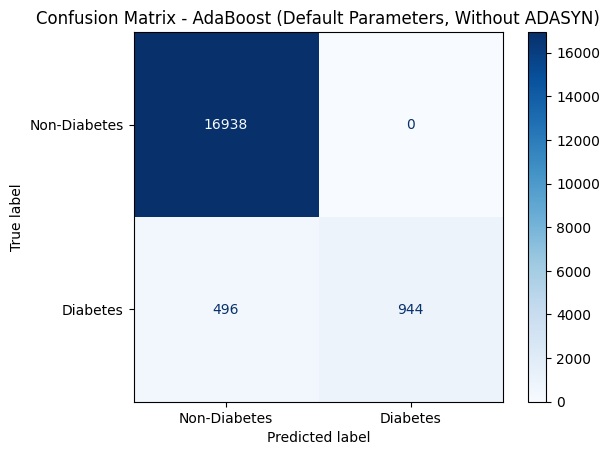


Evaluation Metrics - AdaBoost (Default Parameters, Without ADASYN):
Accuracy: 0.9730
Precision: 1.0000
Recall: 0.6556
F1-Score: 0.7919


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Inisialisasi model AdaBoost dengan parameter default
# Menggunakan DecisionTreeClassifier sebagai base estimator dengan max_depth=1 (sesuai default AdaBoost)
adaboost_model_default = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=42)

# Latih model menggunakan data training ASLI (tanpa ADASYN)
adaboost_model_default.fit(X_train, y_train)

# Lakukan prediksi pada data testing
y_pred_adaboost_default = adaboost_model_default.predict(X_test)

# Hitung confusion matrix
cm_adaboost_default = confusion_matrix(y_test, y_pred_adaboost_default)

# Tampilkan confusion matrix
print("Model 1 - Confusion Matrix - AdaBoost (Default Parameters, Without ADASYN):")
disp_adaboost_default = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost_default, display_labels=['Non-Diabetes', 'Diabetes'])
disp_adaboost_default.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - AdaBoost (Default Parameters, Without ADASYN)')
plt.show()

# Hitung metrik evaluasi
accuracy_adaboost_default = accuracy_score(y_test, y_pred_adaboost_default)
precision_adaboost_default = precision_score(y_test, y_pred_adaboost_default)
recall_adaboost_default = recall_score(y_test, y_pred_adaboost_default)
f1_adaboost_default = f1_score(y_test, y_pred_adaboost_default)

print("\nEvaluation Metrics - AdaBoost (Default Parameters, Without ADASYN):")
print(f"Accuracy: {accuracy_adaboost_default:.4f}")
print(f"Precision: {precision_adaboost_default:.4f}")
print(f"Recall: {recall_adaboost_default:.4f}")
print(f"F1-Score: {f1_adaboost_default:.4f}")

### Model 1 : Classification Report - AdaBoost (Default Parameters, Without ADASYN)

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report_adaboost_default = classification_report(y_test, y_pred_adaboost_default, target_names=['Non-Diabetes', 'Diabetes'])

print("Classification Report - AdaBoost (Default Parameters, Without ADASYN):")
print(report_adaboost_default)

Classification Report - AdaBoost (Default Parameters, Without ADASYN):
              precision    recall  f1-score   support

Non-Diabetes       0.97      1.00      0.99     16938
    Diabetes       1.00      0.66      0.79      1440

    accuracy                           0.97     18378
   macro avg       0.99      0.83      0.89     18378
weighted avg       0.97      0.97      0.97     18378



### ROC Curve - Model 1 AdaBoost (Default Parameters, Without ADASYN)

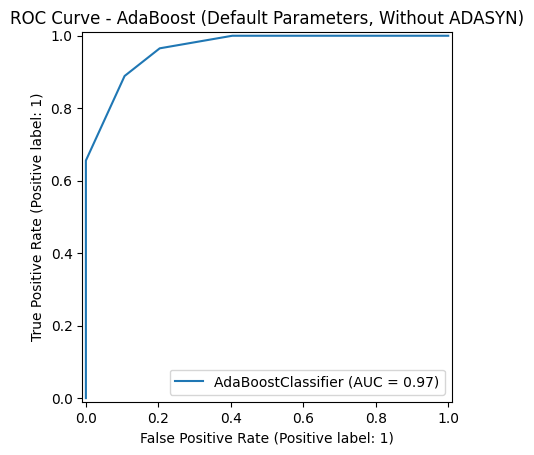

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Plot the ROC curve
RocCurveDisplay.from_estimator(adaboost_model_default, X_test, y_test)
plt.title('ROC Curve - AdaBoost (Default Parameters, Without ADASYN)')
plt.show()

## Model 2: AdaBoost (Parameter Default) dengan ADASYN

Confusion Matrix - AdaBoost (Default Parameters, With ADASYN):


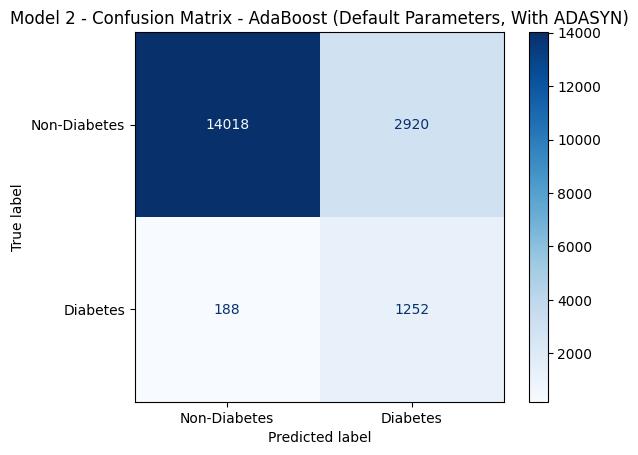


Evaluation Metrics - AdaBoost (Default Parameters, With ADASYN):
Accuracy: 0.8309
Precision: 0.3001
Recall: 0.8694
F1-Score: 0.4462


In [ ]:
# Inisialisasi model AdaBoost dengan parameter default
adaboost_model_adasyn = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    random_state=42
)

# Latih model menggunakan data training hasil ADASYN
adaboost_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Lakukan prediksi pada data testing (menggunakan data testing asli)
y_pred_adaboost_adasyn = adaboost_model_adasyn.predict(X_test)

# Hitung confusion matrix
cm_adaboost_adasyn = confusion_matrix(y_test, y_pred_adaboost_adasyn)

# Tampilkan confusion matrix
print("Confusion Matrix - AdaBoost (Default Parameters, With ADASYN):")
disp_adaboost_adasyn = ConfusionMatrixDisplay(
    confusion_matrix=cm_adaboost_adasyn,
    display_labels=['Non-Diabetes', 'Diabetes']
)
disp_adaboost_adasyn.plot(cmap=plt.cm.Blues)
plt.title('Model 2 - Confusion Matrix - AdaBoost (Default Parameters, With ADASYN)')
plt.show()

# Hitung metrik evaluasi
accuracy_adaboost_adasyn = accuracy_score(y_test, y_pred_adaboost_adasyn)
precision_adaboost_adasyn = precision_score(y_test, y_pred_adaboost_adasyn)
recall_adaboost_adasyn = recall_score(y_test, y_pred_adaboost_adasyn)
f1_adaboost_adasyn = f1_score(y_test, y_pred_adaboost_adasyn)

print("\nEvaluation Metrics - AdaBoost (Default Parameters, With ADASYN):")
print(f"Accuracy: {accuracy_adaboost_adasyn:.4f}")
print(f"Precision: {precision_adaboost_adasyn:.4f}")
print(f"Recall: {recall_adaboost_adasyn:.4f}")
print(f"F1-Score: {f1_adaboost_adasyn:.4f}")




```
# Ini diformat sebagai kode
```

## Model 3: AdaBoost dengan Tuning Hyperparameter (RandomizedSearchCV)

Mulai proses RandomizedSearchCV pada data training ADASYN...
Proses RandomizedSearchCV selesai.

Parameter terbaik dari RandomizedSearchCV (ADASYN):
{'n_estimators': 500, 'learning_rate': 1.0}

Confusion Matrix - AdaBoost (Tuned Parameters, With ADASYN):


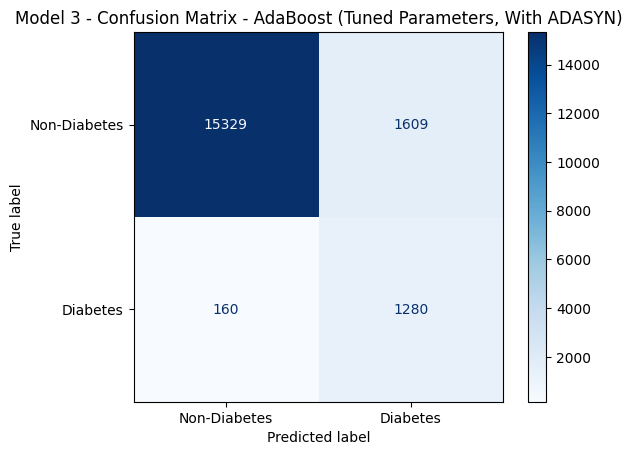


Evaluation Metrics - AdaBoost (Tuned Parameters, With ADASYN):
Accuracy: 0.9037
Precision: 0.4431
Recall: 0.8889
F1-Score: 0.5914


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Inisialisasi base estimator untuk AdaBoost
dt_base = DecisionTreeClassifier(max_depth=1, random_state=42)

# Inisialisasi model AdaBoost
adaboost_model = AdaBoostClassifier(estimator=dt_base, random_state=42)

# Definisikan distribusi parameter untuk RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0, 1.5, 2.0]
}

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=adaboost_model,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Lakukan RandomizedSearchCV pada data training hasil ADASYN
print("Mulai proses RandomizedSearchCV pada data training ADASYN...")
random_search.fit(X_train_adasyn, y_train_adasyn)
print("Proses RandomizedSearchCV selesai.")

# Parameter terbaik
best_params = random_search.best_params_
print("\nParameter terbaik dari RandomizedSearchCV (ADASYN):")
print(best_params)

# Model terbaik
best_adaboost_model_tuned_adasyn = random_search.best_estimator_

# Prediksi data testing asli
y_pred_adaboost_tuned_adasyn = best_adaboost_model_tuned_adasyn.predict(X_test)

# Hitung confusion matrix
cm_adaboost_tuned_adasyn = confusion_matrix(y_test, y_pred_adaboost_tuned_adasyn)

# Tampilkan confusion matrix
print("\nConfusion Matrix - AdaBoost (Tuned Parameters, With ADASYN):")
disp_adaboost_tuned_adasyn = ConfusionMatrixDisplay(
    confusion_matrix=cm_adaboost_tuned_adasyn,
    display_labels=['Non-Diabetes', 'Diabetes']
)
disp_adaboost_tuned_adasyn.plot(cmap=plt.cm.Blues)
plt.title('Model 3 - Confusion Matrix - AdaBoost (Tuned Parameters, With ADASYN)')
plt.show()

# Hitung metrik evaluasi
accuracy_adaboost_tuned_adasyn = accuracy_score(y_test, y_pred_adaboost_tuned_adasyn)
precision_adaboost_tuned_adasyn = precision_score(y_test, y_pred_adaboost_tuned_adasyn)
recall_adaboost_tuned_adasyn = recall_score(y_test, y_pred_adaboost_tuned_adasyn)
f1_adaboost_tuned_adasyn = f1_score(y_test, y_pred_adaboost_tuned_adasyn)

print("\nEvaluation Metrics - AdaBoost (Tuned Parameters, With ADASYN):")
print(f"Accuracy: {accuracy_adaboost_tuned_adasyn:.4f}")
print(f"Precision: {precision_adaboost_tuned_adasyn:.4f}")
print(f"Recall: {recall_adaboost_tuned_adasyn:.4f}")
print(f"F1-Score: {f1_adaboost_tuned_adasyn:.4f}")


### Classification Report - AdaBoost (Tuned Parameters, Without ADASYN)

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report for the tuned model with ADASYN
report_adaboost_tuned_adasyn = classification_report(y_test, y_pred_adaboost_tuned_adasyn, target_names=['Non-Diabetes', 'Diabetes'])

print("Classification Report - AdaBoost (Tuned Parameters, With ADASYN):")
print(report_adaboost_tuned_adasyn)

Classification Report - AdaBoost (Tuned Parameters, With ADASYN):
              precision    recall  f1-score   support

Non-Diabetes       0.99      0.91      0.95     16938
    Diabetes       0.44      0.89      0.59      1440

    accuracy                           0.90     18378
   macro avg       0.72      0.90      0.77     18378
weighted avg       0.95      0.90      0.92     18378



### ROC Curve - Model 3 AdaBoost (Tuned Parameters, Without ADASYN)

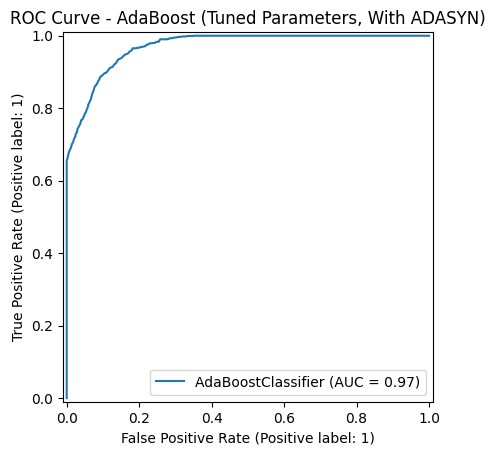

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Plot the ROC curve for the tuned model with ADASYN
RocCurveDisplay.from_estimator(best_adaboost_model_tuned_adasyn, X_test, y_test)
plt.title('ROC Curve - AdaBoost (Tuned Parameters, With ADASYN)')
plt.show()


## Model 4: AdaBoost dengan Tuning Hyperparameter (RandomizedSearchCV) dan ADASYN

Mulai proses RandomizedSearchCV pada data training ADASYN...
Proses RandomizedSearchCV selesai.

Parameter terbaik dari RandomizedSearchCV (ADASYN):
{'n_estimators': 90, 'learning_rate': 1.0}

Confusion Matrix - AdaBoost (Tuned Parameters, With ADASYN):


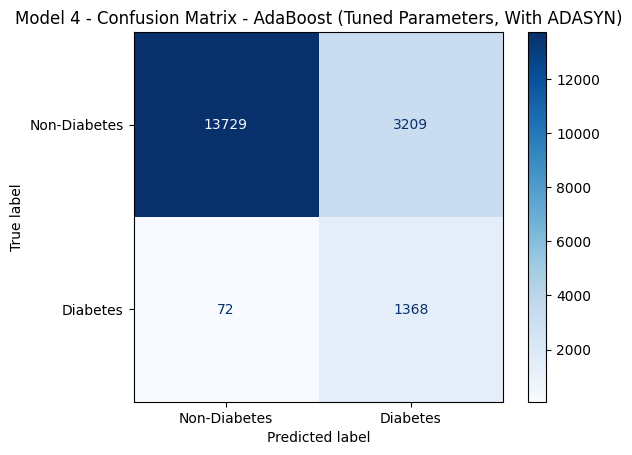


Evaluation Metrics - AdaBoost (Tuned Parameters, With ADASYN):
Accuracy: 0.8215
Precision: 0.2989
Recall: 0.9500
F1-Score: 0.4547


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Inisialisasi base estimator untuk AdaBoost
dt_base = DecisionTreeClassifier(max_depth=1, random_state=42)

# Inisialisasi model AdaBoost
adaboost_model_for_tuning_adasyn = AdaBoostClassifier(estimator=dt_base, random_state=42)

# Definisikan distribusi parameter untuk RandomizedSearchCV
param_distributions_adasyn = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0]
}

# Inisialisasi RandomizedSearchCV
random_search_adasyn = RandomizedSearchCV(
    estimator=adaboost_model_for_tuning_adasyn,
    param_distributions=param_distributions_adasyn,
    n_iter=30,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Lakukan RandomizedSearchCV pada data training ADASYN
print("Mulai proses RandomizedSearchCV pada data training ADASYN...")
random_search_adasyn.fit(X_train_adasyn, y_train_adasyn)
print("Proses RandomizedSearchCV selesai.")

# Parameter terbaik
best_params_adasyn = random_search_adasyn.best_params_
print("\nParameter terbaik dari RandomizedSearchCV (ADASYN):")
print(best_params_adasyn)

# Model terbaik
best_adaboost_model_tuned_adasyn = random_search_adasyn.best_estimator_

# Prediksi pada data testing
y_pred_adaboost_tuned_adasyn = best_adaboost_model_tuned_adasyn.predict(X_test)

# Confusion matrix
cm_adaboost_tuned_adasyn = confusion_matrix(y_test, y_pred_adaboost_tuned_adasyn)

print("\nConfusion Matrix - AdaBoost (Tuned Parameters, With ADASYN):")
disp_adaboost_tuned_adasyn = ConfusionMatrixDisplay(
    confusion_matrix=cm_adaboost_tuned_adasyn,
    display_labels=['Non-Diabetes', 'Diabetes']
)
disp_adaboost_tuned_adasyn.plot(cmap=plt.cm.Blues)
plt.title('Model 4 - Confusion Matrix - AdaBoost (Tuned Parameters, With ADASYN)')
plt.show()

# Metrik evaluasi
accuracy_adaboost_tuned_adasyn = accuracy_score(y_test, y_pred_adaboost_tuned_adasyn)
precision_adaboost_tuned_adasyn = precision_score(y_test, y_pred_adaboost_tuned_adasyn)
recall_adaboost_tuned_adasyn = recall_score(y_test, y_pred_adaboost_tuned_adasyn)
f1_adaboost_tuned_adasyn = f1_score(y_test, y_pred_adaboost_tuned_adasyn)

print("\nEvaluation Metrics - AdaBoost (Tuned Parameters, With ADASYN):")
print(f"Accuracy: {accuracy_adaboost_tuned_adasyn:.4f}")
print(f"Precision: {precision_adaboost_tuned_adasyn:.4f}")
print(f"Recall: {recall_adaboost_tuned_adasyn:.4f}")
print(f"F1-Score: {f1_adaboost_tuned_adasyn:.4f}")


### Classification Report - AdaBoost (Tuned Parameters, With ADASYN)

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report for the tuned model with ADASYN
report_adaboost_tuned_adasyn = classification_report(y_test, y_pred_adaboost_tuned_adasyn, target_names=['Non-Diabetes', 'Diabetes'])

print("Classification Report - AdaBoost (Tuned Parameters, With ADASYN):")
print(report_adaboost_tuned_adasyn)

Classification Report - AdaBoost (Tuned Parameters, With ADASYN):
              precision    recall  f1-score   support

Non-Diabetes       0.99      0.81      0.89     16938
    Diabetes       0.30      0.95      0.45      1440

    accuracy                           0.82     18378
   macro avg       0.65      0.88      0.67     18378
weighted avg       0.94      0.82      0.86     18378



### ROC Curve - Model 4 AdaBoost (Tuned Parameters, With ADASYN)

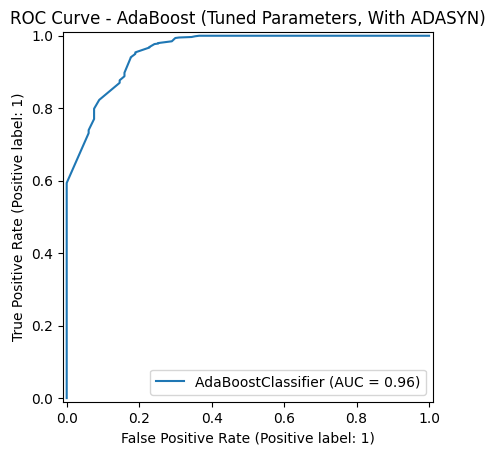

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Plot the ROC curve for the tuned model with ADASYN
RocCurveDisplay.from_estimator(best_adaboost_model_tuned_adasyn, X_test, y_test)
plt.title('ROC Curve - AdaBoost (Tuned Parameters, With ADASYN)')
plt.show()

# Task
To create a web application for predicting diabetes, follow these steps:

1.  **Save Model 2 and Label Encoder**: The `adaboost_model_adasyn` model and the `label_encoder_gender` are saved using `joblib`.
2.  **Create Streamlit Application**: The `app.py` file will be generated, allowing users to input values and receive real-time predictions.
3.  **Generate `requirements.txt`**: This file will list all necessary Python libraries for the application.
4.  **Deployment Instructions**: Steps to deploy the app on Streamlit Cloud will be provided.

```python
import joblib

# Save Model 2 (adaboost_model_adasyn)
joblib.dump(adaboost_model_adasyn, 'model2.pkl')

# Save the gender label encoder
joblib.dump(label_encoder_gender, 'label_encoder_gender.pkl')

print("Model 2 (adaboost_model_adasyn) and label_encoder_gender saved as 'model2.pkl' and 'label_encoder_gender.pkl' respectively.")
```

```python
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the trained model and label encoder
try:
    model = joblib.load('model2.pkl')
    gender_encoder = joblib.load('label_encoder_gender.pkl')
except FileNotFoundError:
    st.error("Error: model2.pkl or label_encoder_gender.pkl not found. Make sure they are in the same directory.")
    st.stop() # Stop the app if files are not found

st.title("Diabetes Prediction App")
st.write("Enter the patient's information to get a diabetes prediction.")

# Create input fields for features
st.sidebar.header("Patient Information")

# Gender input
gender_options = ['Female', 'Male', 'Other'] # Assuming these are the classes the encoder was fitted on
gender_input = st.sidebar.selectbox("Gender", gender_options)

# Encode gender input using the loaded encoder
try:
    gender_encoded = gender_encoder.transform([gender_input])[0]
except ValueError:
    st.sidebar.warning(f"Warning: '{gender_input}' is not a recognized gender. Please select from the dropdown.")
    gender_encoded = None # Set to None to prevent prediction with invalid input

age = st.sidebar.slider("Age", 0, 100, 30)
hba1c_level = st.sidebar.number_input("HbA1c Level", min_value=0.0, max_value=20.0, value=5.7, step=0.1)
blood_glucose_level = st.sidebar.number_input("Blood Glucose Level", min_value=0, max_value=600, value=120)

# Make prediction when button is clicked
if st.sidebar.button("Predict"):
    if gender_encoded is not None:
        # Create a DataFrame from user inputs
        input_data = pd.DataFrame([[gender_encoded, age, hba1c_level, blood_glucose_level]],
                                  columns=['gender', 'age', 'HbA1c_level', 'blood_glucose_level'])

        # Display input data (optional, for debugging)
        # st.write("Input Data:")
        # st.dataframe(input_data)

        # Make prediction
        prediction = model.predict(input_data)
        prediction_proba = model.predict_proba(input_data)

        st.subheader("Prediction Result:")
        if prediction[0] == 1:
            st.error(f"The model predicts: Diabetes (Probability: {prediction_proba[0][1]:.2f})")
            st.write("It is highly recommended to consult a medical professional for diagnosis and treatment.")
        else:
            st.success(f"The model predicts: No Diabetes (Probability: {prediction_proba[0][0]:.2f})")
            st.write("Maintain a healthy lifestyle and regular check-ups.")
    else:
        st.error("Cannot make prediction due to invalid gender input.")

st.markdown("---")
st.markdown("Disclaimer: This application is for educational and demonstrative purposes only and should not be used as a substitute for professional medical advice, diagnosis, or treatment.")
```

```python
%%writefile requirements.txt
streamlit
scikit-learn
pandas
joblib
imblearn
```

```text
Deployment Instructions:

1.  **Save the files**: Ensure you have `model2.pkl`, `label_encoder_gender.pkl`, `app.py`, and `requirements.txt` in the same directory on your local machine.

2.  **Create a GitHub Repository**:
    *   Go to GitHub and create a new public repository (e.g., `diabetes_prediction_app`).
    *   Upload all four files (`model2.pkl`, `label_encoder_gender.pkl`, `app.py`, `requirements.txt`) to this new repository.

3.  **Deploy to Streamlit Cloud**:
    *   Go to [Streamlit Cloud](https://share.streamlit.io/).
    *   Log in with your GitHub account.
    *   Click on "New app" from your dashboard.
    *   Select your GitHub repository (`diabetes_prediction_app`).
    *   Specify the branch (usually `main` or `master`).
    *   Set the main file path to `app.py`.
    *   Click "Deploy!".

Streamlit Cloud will then build and deploy your application. This process might take a few minutes. Once deployed, you will get a public URL for your diabetes prediction app.
```

## Save Model 2

### Subtask:
Generate Python code to save the trained 'Model 2' (adaboost_model_adasyn) as 'model2.pkl' using the `joblib` library. This code will also demonstrate its usage.


**Reasoning**:
The subtask requires saving the trained model and the label encoder using `joblib` for future use. I will import `joblib` and then use `joblib.dump()` to save the specified objects with their respective filenames.



In [ ]:
import joblib

# Save Model 2 (adaboost_model_adasyn)
joblib.dump(adaboost_model_adasyn, 'model2.pkl')

# Save label_encoder_gender
joblib.dump(label_encoder_gender, 'label_encoder_gender.pkl')

print("Model 'model2.pkl' and Label Encoder 'label_encoder_gender.pkl' saved successfully.")

Model 'model2.pkl' and Label Encoder 'label_encoder_gender.pkl' saved successfully.


**Reasoning**:
The previous step successfully saved the model and label encoder. Now, I will generate the Python code for the Streamlit application (`app.py`) as instructed in the main task to allow users to input values and receive real-time predictions.



In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the trained model and label encoder
try:
    model = joblib.load('model2.pkl')
    gender_encoder = joblib.load('label_encoder_gender.pkl')
except FileNotFoundError:
    st.error("Error: model2.pkl or label_encoder_gender.pkl not found. Make sure they are in the same directory.")
    st.stop() # Stop the app if files are not found

st.title("Diabetes Prediction App")
st.write("Enter the patient's information to get a diabetes prediction.")

# Create input fields for features
st.sidebar.header("Patient Information")

# Gender input
gender_options = ['Female', 'Male', 'Other'] # Assuming these are the classes the encoder was fitted on
gender_input = st.sidebar.selectbox("Gender", gender_options)

# Encode gender input using the loaded encoder
try:
    gender_encoded = gender_encoder.transform([gender_input])[0]
except ValueError:
    st.sidebar.warning(f"Warning: '{gender_input}' is not a recognized gender. Please select from the dropdown.")
    gender_encoded = None # Set to None to prevent prediction with invalid input

age = st.sidebar.slider("Age", 0, 100, 30)
hba1c_level = st.sidebar.number_input("HbA1c Level", min_value=0.0, max_value=20.0, value=5.7, step=0.1)
blood_glucose_level = st.sidebar.number_input("Blood Glucose Level", min_value=0, max_value=600, value=120)

# Make prediction when button is clicked
if st.sidebar.button("Predict"):
    if gender_encoded is not None:
        # Create a DataFrame from user inputs
        input_data = pd.DataFrame([[gender_encoded, age, hba1c_level, blood_glucose_level]],
                                  columns=['gender', 'age', 'HbA1c_level', 'blood_glucose_level'])

        # Display input data (optional, for debugging)
        # st.write("Input Data:")
        # st.dataframe(input_data)

        # Make prediction
        prediction = model.predict(input_data)
        prediction_proba = model.predict_proba(input_data)

        st.subheader("Prediction Result:")
        if prediction[0] == 1:
            st.error(f"The model predicts: Diabetes (Probability: {prediction_proba[0][1]:.2f})")
            st.write("It is highly recommended to consult a medical professional for diagnosis and treatment.")
        else:
            st.success(f"The model predicts: No Diabetes (Probability: {prediction_proba[0][0]:.2f})")
            st.write("Maintain a healthy lifestyle and regular check-ups.")
    else:
        st.error("Cannot make prediction due to invalid gender input.")

st.markdown("---")
st.markdown("Disclaimer: This application is for educational and demonstrative purposes only and should not be used as a substitute for professional medical advice, diagnosis, or treatment.")

Writing app.py


**Reasoning**:
The next step in the main task is to generate the `requirements.txt` file, which lists all Python libraries necessary for the Streamlit application. I will use the `%%writefile` magic command to create this file with the specified content.



In [ ]:
%%writefile requirements.txt
streamlit
scikit-learn
pandas
joblib
imblearn

Writing requirements.txt


## Provide Deployment Instructions

### Subtask:
Provide detailed instructions on how to deploy the Streamlit application to Streamlit Cloud.


### Deployment Instructions:

1.  **Save the files**: Ensure you have `model2.pkl`, `label_encoder_gender.pkl`, `app.py`, and `requirements.txt` in the same directory on your local machine.

2.  **Create a GitHub Repository**:
    *   Go to GitHub and create a new public repository (e.g., `diabetes_prediction_app`).
    *   Upload all four files (`model2.pkl`, `label_encoder_gender.pkl`, `app.py`, `requirements.txt`) to this new repository.

3.  **Deploy to Streamlit Cloud**:
    *   Go to [Streamlit Cloud](https://share.streamlit.io/).
    *   Log in with your GitHub account.
    *   Click on "New app" from your dashboard.
    *   Select your GitHub repository (`diabetes_prediction_app`).
    *   Specify the branch (usually `main` or `master`).
    *   Set the main file path to `app.py`.
    *   Click "Deploy!".

Streamlit Cloud will then build and deploy your application. This process might take a few minutes. Once deployed, you will get a public URL for your diabetes prediction app.

## Final Task

### Subtask:
Review all generated files and instructions, confirming they meet the deployment requirements and provide a ready-to-use Streamlit application.


## Summary:

### Data Analysis Key Findings
*   **Model and Encoder Saved**: The `adaboost_model_adasyn` model was successfully saved as `model2.pkl`, and the `label_encoder_gender` was saved as `label_encoder_gender.pkl`.
*   **Streamlit Application Generated**: The `app.py` file, containing the Streamlit application logic for user input and diabetes prediction, was successfully created.
*   **Dependencies Listed**: The `requirements.txt` file, listing necessary Python libraries (streamlit, scikit-learn, pandas, joblib, imblearn), was successfully created.
*   **Deployment Instructions Provided**: Comprehensive, step-by-step instructions for deploying the application to Streamlit Cloud were generated, covering file preparation, GitHub repository setup, and Streamlit Cloud deployment.

### Insights or Next Steps
*   The generated files (`model2.pkl`, `label_encoder_gender.pkl`, `app.py`, `requirements.txt`) are ready for immediate deployment to Streamlit Cloud by following the provided instructions.
*   To enhance user experience or model robustness, consider adding more detailed input validation, incorporating confidence scores for predictions, or exploring advanced model monitoring post-deployment.
